# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [155]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [156]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

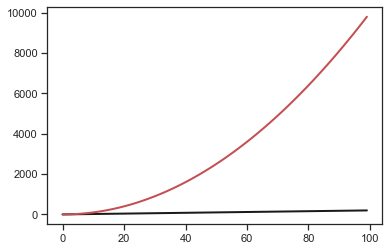

In [157]:
# Method 1
plt.plot(x, y, color= 'k', lw= 2)
plt.plot(x, z, color= 'r', lw= 2)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

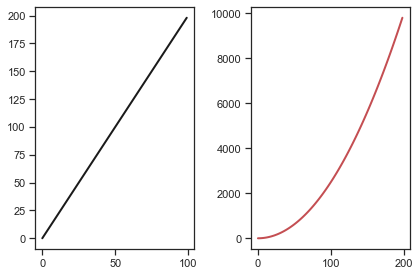

In [158]:
# Method 2
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y, color= 'k', lw= 2)
ax2.plot(y, z, color= 'r', lw= 2)

fig.tight_layout()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

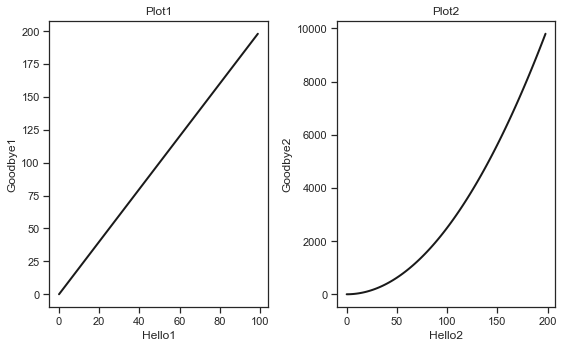

In [159]:
# your code here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.plot(x, y, color= 'k', lw= 2)
ax2.plot(y, z, color= 'k', lw= 2)

ax1.set_title('Plot1')
ax2.set_title('Plot2')

ax1.set_xlabel('Hello1')
ax2.set_xlabel('Hello2')

ax1.set_ylabel('Goodbye1')
ax2.set_ylabel('Goodbye2')

# leave enough room for all labels and ticks
fig.tight_layout()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

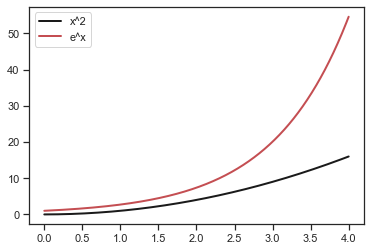

In [160]:
# your code here
xaxis = np.linspace(0, 4, 1000)
y1 = lambda x: x**2
y2 = lambda x: np.exp(x)

plt.plot(xaxis, y1(xaxis), color= 'k', lw= 2, label= 'x^2')
plt.plot(xaxis, y2(xaxis), color= 'r', lw= 2, label= 'e^x')
plt.legend()

#### As a bonus challenge, try to add a legend to the plot.

In [161]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [162]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

([<matplotlib.axis.YTick at 0x278e7ea9388>,
 <a list of 2 Text yticklabel objects>)

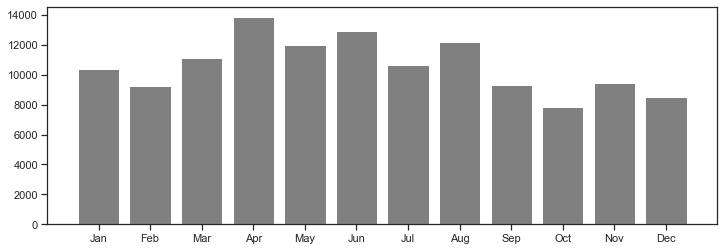

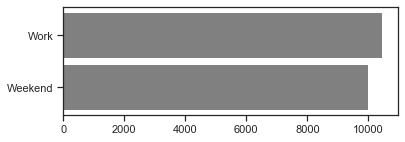

In [163]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
monthly_steps = fitbit.groupby(by= ['Months_encoded'])['Steps'].median()

fig = plt.figure(figsize= (12, 4))
plt.bar(monthly_steps.index, monthly_steps.values, color= 'grey')
plt.xticks(monthly_steps.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

weekly_steps = fitbit.groupby(by= ['Work_or_Weekend'])['Steps'].median()

fig = plt.figure(figsize= (6, 2))
plt.barh(weekly_steps.index, weekly_steps.values, height= 0.9, color= 'gray', align='center', )
plt.yticks([0, 1], ['Weekend', 'Work'])

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

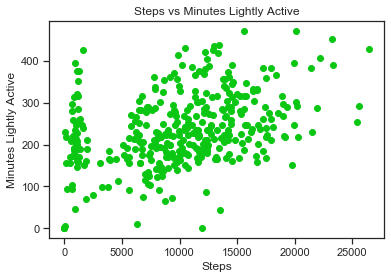

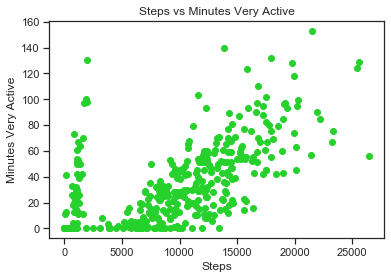

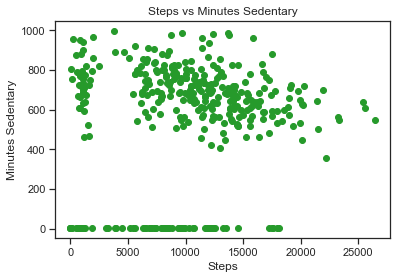

In [164]:
# your code here
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for col in cols:
    plt.figure()
    plt.title('Steps vs ' + col)
    plt.xlabel('Steps')
    plt.ylabel(col)
    plt.scatter(fitbit['Steps'], fitbit[col], color= np.random.rand(3,))

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [165]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [166]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [167]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [168]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [169]:
# your code here
sns.set(style="white")

#### Use the right visulalization to show the distribution of column `Age`.

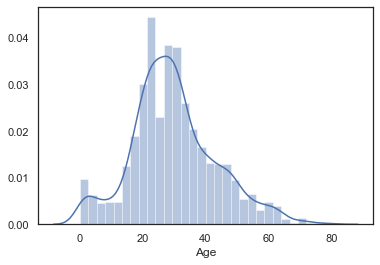

In [170]:
# your code here
sns.distplot(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

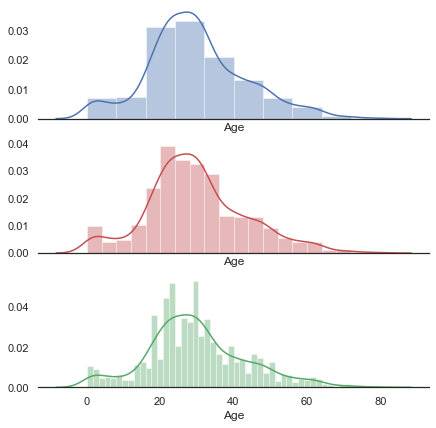

In [171]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a simple histogram binsize 10
sns.distplot(titanic['Age'], color="b", ax=axes[0], bins= 10)

# Plot a simple histogram binsize 20
sns.distplot(titanic['Age'], color="r", ax=axes[1], bins= 20)

# Plot a simple histogram binsize 50
sns.distplot(titanic['Age'], color="g", ax=axes[2], bins= 50)

#### How does the bin size affect your plot?

In [172]:
"""
As we increase the number of bins we increase the resolution (more detail) of our visualization 
but the distribution becomes more noisy (you have less values in each bin)

As an interesting note it seems that the age distribution is bimodal. This probably means that the 
population of the boat was mostly composed of families with their young children (not many teenagers)
"""

'\nAs we increase the number of bins we increase the resolution (more detail) of our visualization \nbut the distribution becomes more noisy (you have less values in each bin)\n\nAs an interesting note it seems that the age distribution is bimodal. This probably means that the \npopulation of the boat was mostly composed of families with their young children (not many teenagers)\n'

#### Use seaborn to show the distribution of column `Age`.

In [173]:
# Ooops I did that already before, maybe I was supposed to use matplotlib but did it with seaborn.

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

([<matplotlib.patches.Wedge at 0x278e7e5d288>,
 [Text(-0.9893411041363958, -0.4808369574670583, 'Male'),
  Text(1.0792811554005672, 0.5245495091954779, 'Female')],
 [Text(-0.5396406022562158, -0.26227470407294085, '64.4%'),
  Text(0.6295806739836642, 0.30598721369736215, '35.6%')])

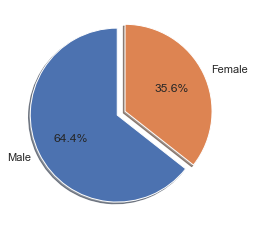

In [174]:
# Method 1 - matplotlib - i know I didn't have to do this I could have used the value counts directly 
# but I wanted to try it out!
titanic.Gender = pd.Categorical(titanic.Gender)
titanic['Gender Code'] = titanic.Gender.cat.codes
gender_ratios = titanic['Gender Code'].value_counts(normalize=True) * 100

plt.figure()
plt.pie(gender_ratios, explode=[0, 0.1], labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, startangle=90)

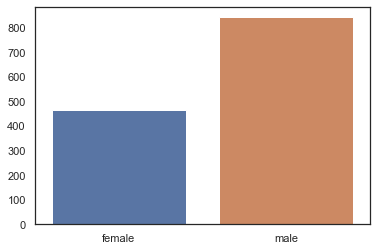

In [175]:
# Method 2 - seaborn
# your code here
sns.barplot(titanic.Gender.value_counts().index, titanic.Gender.value_counts().values)

#### Use the right plot to visualize the column `Pclass`.

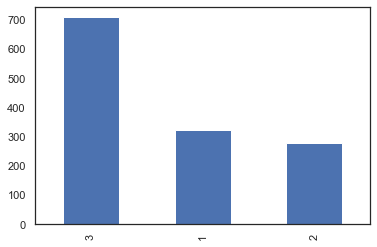

In [176]:
# your code here
titanic['Pclass'].value_counts().plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x278e6c55e48>,
 'caps': [<matplotlib.lines.Line2D at 0x278e6a4c948>,
 'boxes': [<matplotlib.lines.Line2D at 0x278e6c554c8>],
 'medians': [<matplotlib.lines.Line2D at 0x278e6ab69c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x278e6bdb6c8>],
 'means': []}

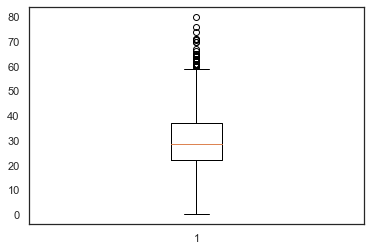

In [177]:
# your code here
plt.boxplot(titanic.Age)

In [178]:
"""
I used a boxplot because it describes the distribution in a single figure.
We can see min, 25, median, 75, max and outliers.
"""

'\nI used a boxplot because it describes the distribution in a single figure.\nWe can see min, 25, median, 75, max and outliers.\n'

#### What does the last plot tell you about the feature `Age`?

In [179]:
"""
To me this plot tells me that the median age in the boat was relatively low (~30 yo)
and that anyone above 60 was an outlier!
"""

'\nTo me this plot tells me that the median age in the boat was relatively low (~30 yo)\nand that anyone above 60 was an outlier!\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

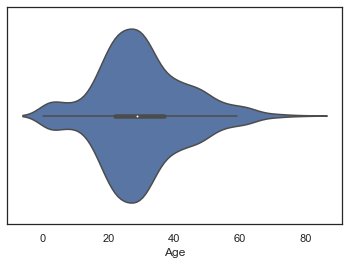

In [180]:
# your code here
sns.violinplot("Age", data = titanic)

#### What additional information does the last plot provide about feature `Age`?

In [181]:
"""
This plot has a box plot inside of the violin. So in addition to the summary statistic it gives us the
distribution of all the data points.
"""

'\nThis plot has a box plot inside of the violin. So in addition to the summary statistic it gives us the\ndistribution of all the data points.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [182]:
# Method 1 - matplotlib
# your code here

In [183]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

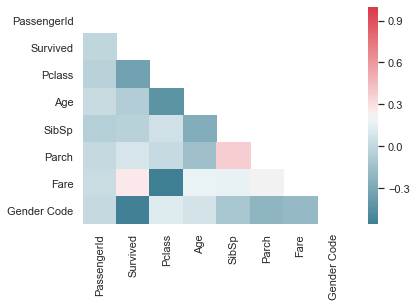

In [184]:
# make correlation matrix
corr_mat = titanic.corr()

# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_mat, cmap=cmap, mask=mask)

#### What are the most correlated features?

In [185]:
"""
Seems like Fare and Survived and SibSp and parch are the most correlated.
"""

'\nSeems like Fare and Survived and SibSp and parch are the most correlated.\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

{'whiskers': [<matplotlib.lines.Line2D at 0x278e0b2ea08>,
 'caps': [<matplotlib.lines.Line2D at 0x278e2d64108>,
 'boxes': [<matplotlib.lines.Line2D at 0x278e2dcddc8>,
 'medians': [<matplotlib.lines.Line2D at 0x278e2d2ccc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x278e2d0fac8>,
 'means': []}

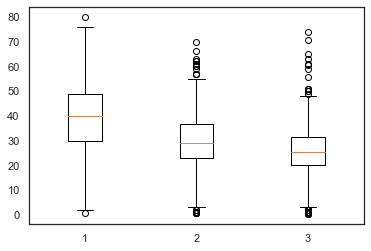

In [186]:
# your code here
plt.boxplot([titanic.loc[titanic['Pclass'] == 1, 'Age'], titanic.loc[titanic['Pclass'] == 2, 'Age'], titanic.loc[titanic['Pclass'] == 3, 'Age']])

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

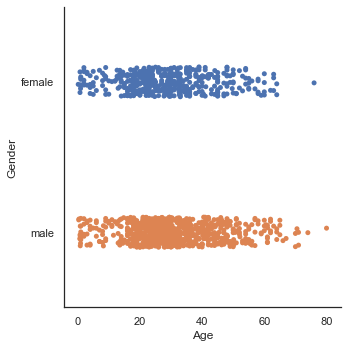

In [188]:
sns.catplot(x="Age", y="Gender", data=titanic)